# Part I - Ford GoBike System Data Exploration
## by Ewurabena Bainson

## Table of Contents
* [Introduction](#Introduction)
* [Preliminary Wrangling](#Wrangling)
    * [What is the structure of your dataset?](#Structure)
    * [What is/are the main feature(s) of interest in your dataset?](#Main_Feature)
    * [What features in the dataset do you think will help support your investigation into your feature(s) of interest](#Investigation)
* [Univariate Exploration](#Univariate)
    * [User Distribution](#Users)
    * [Gender Distribution](#Gender)
    * [Member birth years](#Year)
    * [Ride Duration](#Duration)
    * [Start and End Station](#Station)
* [Bivariate Exploration](#Bivariate)
* [Multivariate Exploration](#Multivariate) 
* [Conclusion](#Conclusions)

## Introduction<a class="anchor" id="Introduction"></a>
The Ford GoBike System data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Within this dataset, there is personal information about the users, duration of the ride, the start and end station amongst others.

My interest will be to find out more about the ride durations and distribution of the member attributes such as the birth year, gender, user type; and to determine if there are any values that affect the ride durations.

Through this analysis I intend to answer the following questions:
1. What is the dominant gender amongst the users?
2. Which year were most users born?
3. Which start and end stations are frequently used?
4. What is the duration of most rides? 
5. Are there any effects of the members' attributes (such as birth year, gender, etc) on the ride duration?

## Preliminary Wrangling<a class="anchor" id="Wrangling"></a>


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load Ford GoBike dataset into dataframe
df_FordGoBike = pd.read_csv('201902-fordgobike-tripdata.csv')
df_FordGoBike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#Use shape, info, describe and other necessary methods to check the Dataset Structure
print(df_FordGoBike.shape)
print(df_FordGoBike.info())
print(df_FordGoBike.describe())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB
None
   

In [3]:
#change the datatypes for the start_time, end_time and member_birth_year columns
#change NaN values in 'member_birth_year' column to 0
df_FordGoBike['member_birth_year'] = df_FordGoBike['member_birth_year'].fillna(0)

# convert member_birth_year from float to integer
df_FordGoBike = df_FordGoBike.astype({"member_birth_year":"int64"})

#convert start_time and end_time to datetime columns
df_FordGoBike['start_time'] = pd.to_datetime(df_FordGoBike['start_time'])
df_FordGoBike['end_time'] = pd.to_datetime(df_FordGoBike['end_time'])

#confirm that datatypes have been changed
df_FordGoBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          183412 non-null int64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: datetime64[ns](2), float64(6), int64(3), object(5)
memory usag

In [4]:
# check number of null values for each column
print(df_FordGoBike.isnull().sum())
print('  ')
print(df_FordGoBike.user_type.unique())

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year             0
member_gender              8265
bike_share_for_all_trip       0
dtype: int64
  
['Customer' 'Subscriber']


In [5]:
print('Number of unique start stations:')
print(df_FordGoBike.start_station_id.nunique())

print('Number of unique bike_share_for_all_trip values:')
print(df_FordGoBike.bike_share_for_all_trip.nunique())
# bike share column valuesprint
print(df_FordGoBike.bike_share_for_all_trip.unique())

Number of unique start stations:
329
Number of unique bike_share_for_all_trip values:
2
['No' 'Yes']


### What is the structure of your dataset?<a class="anchor" id="Structure"></a>

The Ford GoBike System dataset has 183,412 rows and 16 columns. Each record provides information on individual rides; such as the member information (member_birth_year, member_gender, user_type) and trip information (start_time, end_time, duration_sec,etc). Of the 16 columns, there are about 10 columns with no null values. 
The dataset consist mainly of float and string values. The start_time and end_time columns were converted to datetime columns and the member_birth_year column was converted to an integer.

We also see that the FordGoBike users can belong to one of two user types; Customer or Subscriber.

### What is/are the main feature(s) of interest in your dataset?<a class="anchor" id="Main_Feature"></a>

I would like to find out if there are any factors that influence the duration of rides.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?<a class="anchor" id="Investigation"></a>

I think the member's gender, birth year,start station and user type will affect the duration of rides.

## Univariate Exploration<a class="anchor" id="Univariate"></a>


### User Distribution<a class="anchor" id="Users"></a>
what is the distribution of user types?

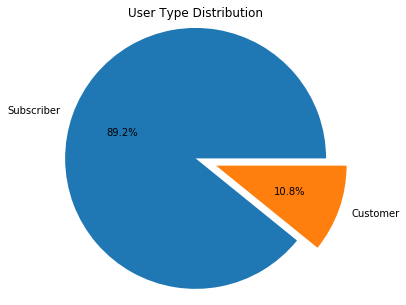

In [6]:
#Find value counts of the user types
user_types = df_FordGoBike['user_type'].value_counts()
plt.figure(figsize = [5, 5]);
#Use code below to ensure that pie chart is a circle not oval
plt.axis('square');
#Plot piechart 
plt.pie(user_types, labels = user_types.index, explode = [0, 0.2], radius = 1.2, autopct ='%0.1f%%'); 
#Include a chart title
plt.title('User Type Distribution'); 

As earlier mentioned, there are 2 distinct types of users within the Ford GoBike System; Customers and Subscribers. We notice however, from the pie chart above that majority of the users are subscribers of the system, and account for 89.2% of the total number of users. 

### Gender Distribution<a class="anchor" id="Gender"></a>
what is the gender distribution of users?

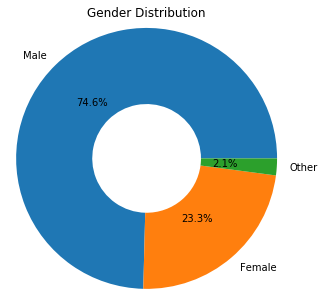

In [7]:
#Plot a donut chart showing user gender, include chart title and labels.
gender = df_FordGoBike['member_gender'].value_counts()
plt.figure(figsize = [5, 5]);
plt.axis('square');
plt.pie(gender, labels = gender.index, wedgeprops = {'width': 0.7}, radius = 1.2, autopct ='%0.1f%%'); 
plt.title('Gender Distribution');

Out of the 183412 entries of trips for GoBike users, majority are male, accounting for 74.6% of the total number of users.23.3% are females and the remaining 2.1% identify as other.

### Member Birth Years<a class="anchor" id="Year"></a>
Which year accounts for the most number of users?

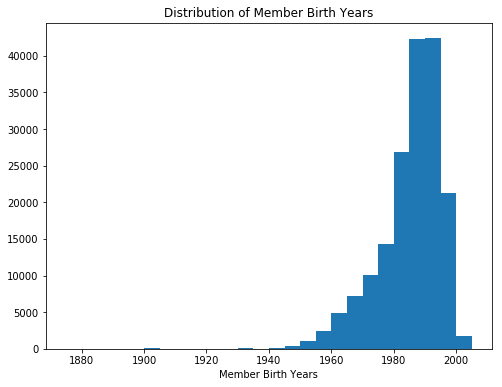

In [46]:
# Define a function to plot histogram
# The function requires the column to use (col), minimum value (minval), maximum value (maxval), figure size, 
# the x axis label(xlab) and chart title(title)

def histogram (col, minval, maxval, bsize, fsize, xlab, title):
    #calculate  bins to use
    bins = np.arange(minval, maxval, bsize)
    #define figure size
    plt.figure(figsize = fsize);
    #plot the histogram of selected column and define the bins
    plt.hist(col, bins=bins);
    #add x axis label
    plt.xlabel(xlab);
    #add chart title
    plt.title(title);

# Plot a histogram showing distribution of member birth years    
histogram(df_FordGoBike['member_birth_year'], 1875, df_FordGoBike['member_birth_year'].max()+5, 5, [8,6], 
          'Member Birth Years', 'Distribution of Member Birth Years')

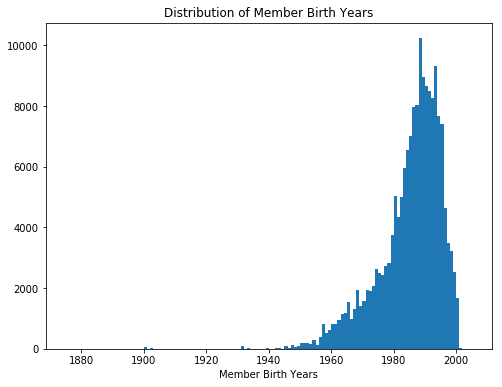

In [9]:
# Let's reduce the bin size for clearer view
histogram (df_FordGoBike['member_birth_year'], 1875, df_FordGoBike['member_birth_year'].max()+5, 1, [8, 6], 
           'Member Birth Years', 'Distribution of Member Birth Years')

The histogram showing the distribution of users birth year indicates that majority of the users were born between the year 1980-2000. There are however a few users born in the early 1900s.

### Ride Duration<a class="anchor" id="Duration"></a>

How long do users typically take rides for?

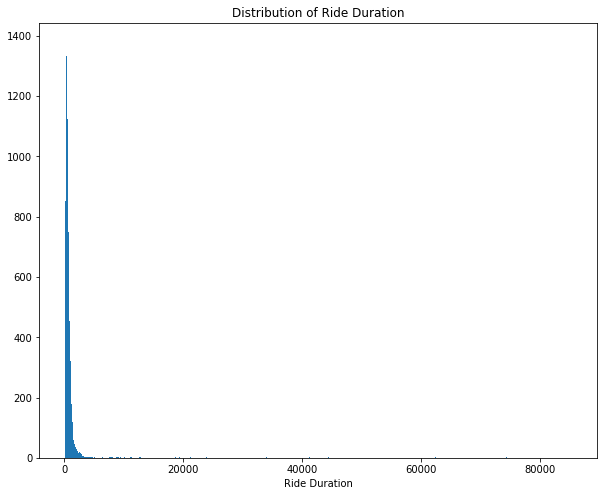

In [10]:
#Plot histogram to view distribution of ride durations
histogram (df_FordGoBike['duration_sec'], df_FordGoBike['duration_sec'].min(), df_FordGoBike['duration_sec'].max()+5, 5, [10, 8], 
           'Ride Duration', 'Distribution of Ride Duration')

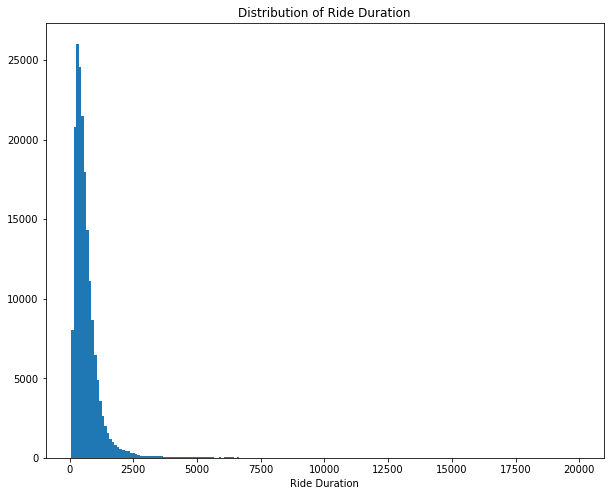

In [11]:
# From the plot above we realize that majority of the duration fall under 20000 seconds
# Let's reduce the plot area for the chart, using the minimum value of 60 and maximum value of 15000
histogram (df_FordGoBike['duration_sec'], 60, 20000, 100, [10, 8], 'Ride Duration', 'Distribution of Ride Duration')

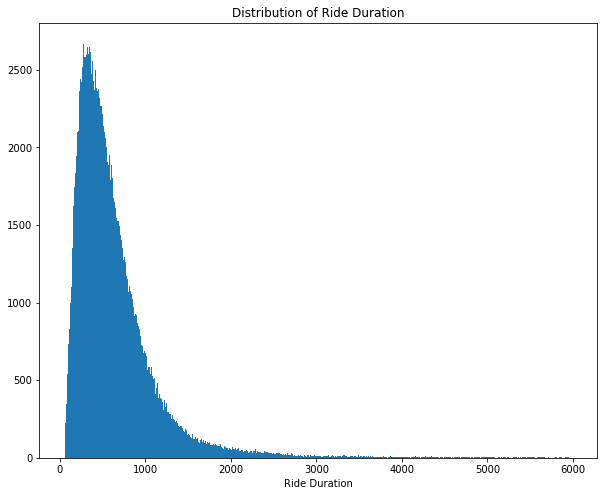

In [12]:
# Let's reduce the plot area further and use an even smaller bin size seeing as most values are visible under the 5000 seconds mark
histogram (df_FordGoBike['duration_sec'], 60, 6000, 10, [10, 8], 'Ride Duration', 'Distribution of Ride Duration')

Most rides last between 0 to 1000 seconds, as seen in the histogram above.

### Bike Share<a class="anchor" id="BikeShare"></a>


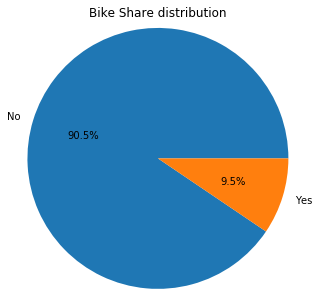

In [15]:
#Find value counts of the bike shares for all trip
bikeshare = df_FordGoBike['bike_share_for_all_trip'].value_counts()
plt.figure(figsize = [5, 5]);
#Use code below to ensure that pie chart is a circle not oval
plt.axis('square');
#Plot piechart 
plt.pie(bikeshare, labels = bikeshare.index, radius = 1.2, autopct ='%0.1f%%'); 
#Include a chart title
plt.title('Bike Share distribution'); 

We notice from piechart above that the majority of the trips, 90.5% involve no biksharing for the entire trip.

### Start and End Stations<a class="anchor" id="Station"></a>

Is there a frequently used start station or end station?

In [47]:
# Define a function to plot a bar chart
# The function requires the column to use (colname), chart title (title), x and y axes labels (xlab, ylab)
def barchart (colname, title, xlab, ylab):
    #count the values of the required column and group by required column and assign  result to the variable plotdata
    plotdata = df_FordGoBike.groupby(colname)[colname].count().nlargest(10)
    #plot a barchart of the plotdata
    plotdata.plot(kind='barh', figsize =(10,8), color="#488AC7");
    # set chart title
    plt.title(title,weight ='bold');
    # set label for x axis
    plt.xlabel(xlab, labelpad=15, weight='bold',size=12);
    # set label for y axis
    plt.ylabel(ylab,labelpad=15, weight='bold',size=12);

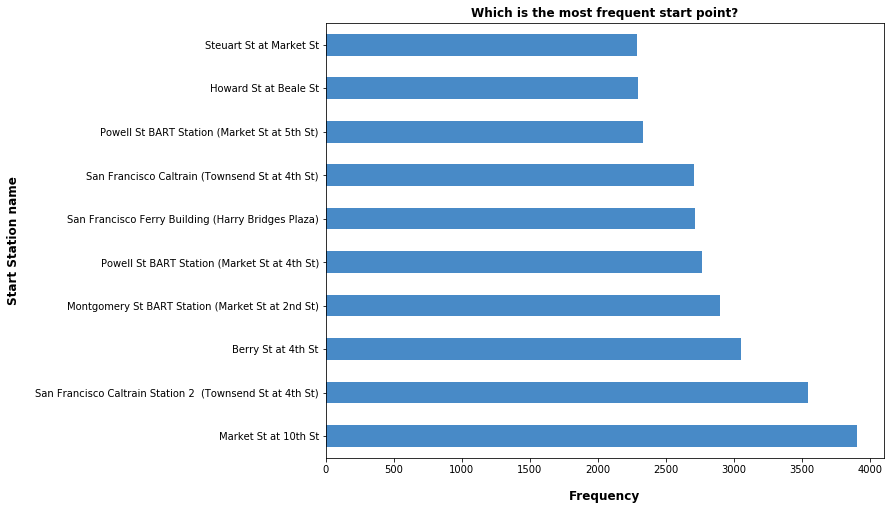

In [48]:
#What are the 10 frequently used start stations?
barchart('start_station_name',"Which is the most frequent start point?","Frequency","Start Station name")

Of the 329 unique start stations, the above chart displays the 10 frequently used start stations; the most frequent being the Market St at 10th St.

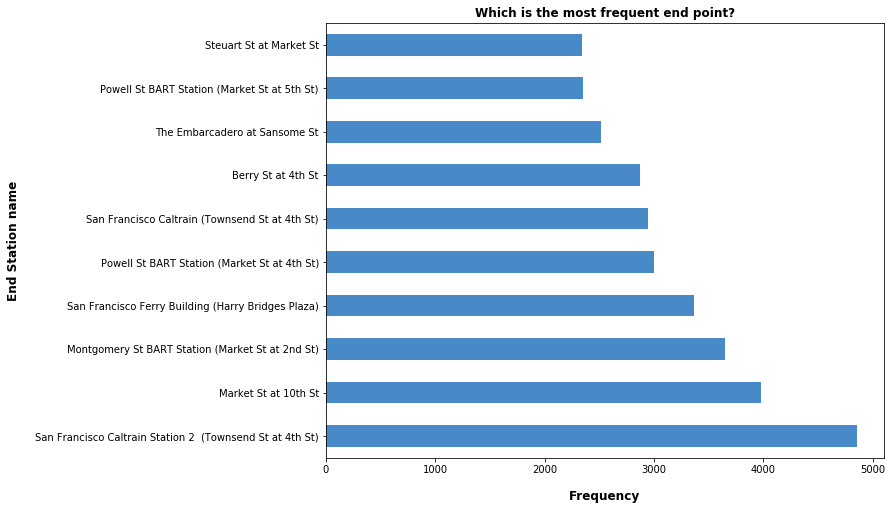

In [49]:
#What are the 10 frequently used end stations?
barchart('end_station_name',"Which is the most frequent end point?","Frequency","End Station name")

Similarly, the above chart displays the 10 frequently used end stations; the most frequent being the San Francisco Caltrain Station 2 (Townsend St at 4th St)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Ride durations are typically below 6000 seconds. Majority of the rides were however under 1000 seconds. 

Males also accounted for the most number of users. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The Member birth years were in float format, with NaN or null values, which would not have made plotting the histograms possible. The column was subsequently converted to integer.

The startTime and EndTime columns were also converted from strings to datetime format.

Also, though the maximum ride duration is 85444 seconds, we noticed from the histogram plotted that this was an outlier. That is, majority of the ride duration were between 0 to 6000 seconds. As such the plot area was reduced to give a better representation

## Bivariate Exploration<a class="anchor" id="Bivariate"></a>
For this bivariate exploration, we will find out if there are any relationships between pairs of data.

For the first chart we want to find out what is the distribution user types per member gender?

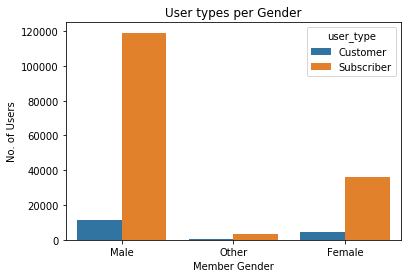

In [50]:
#Plot group bar chart of user types per member gender 
plot = sb.countplot(data = df_FordGoBike, x = 'member_gender', hue = 'user_type');
plot.set_xlabel('Member Gender');
plot.set_ylabel('No. of Users');
plot.set_title('User types per Gender');

From the above chart we can see that there are more male Subscribers than there are female or other subscribers. However, for all the gender types, there are relatively more subscribers than there are 'Customers'.

Next we will plot the user type against the possibility of a bike share for all trip. Does the type of user affect their ability to engage in a bike share?

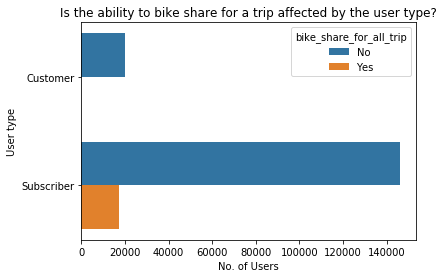

In [52]:
#user type per bike share status
plot = sb.countplot(data = df_FordGoBike, y = 'user_type', hue = 'bike_share_for_all_trip');
plot.set_ylabel('User type');
plot.set_xlabel('No. of Users');
plot.set_title('Is the ability to bike share for a trip affected by the user type?');

We notice from the chart above that only subscribers are able to use bike share for all trip.

Let's compare ride durations against member gender, user type, birth year and start station.

First, does the member gender affect ride duration?

In [53]:
# Define function to create a violin plot
# The function requires the figure size, columns to use on x and y axes, x and y axes labels and chart title
def violinchart (fsize, xcol, ycol, ylab, xlab, title):
    # set base color to prevent multi colored chart
    basecolor = sb.color_palette()[0] 
    # define figure size
    plt.figure(figsize = fsize)
    # plot violin chart
    sb.violinplot(data=df_FordGoBike, x=xcol, y=ycol, color=basecolor);
    # set x & y axes labels and chart title
    plt.ylabel(ylab);
    plt.xlabel(xlab);
    plt.title(title);

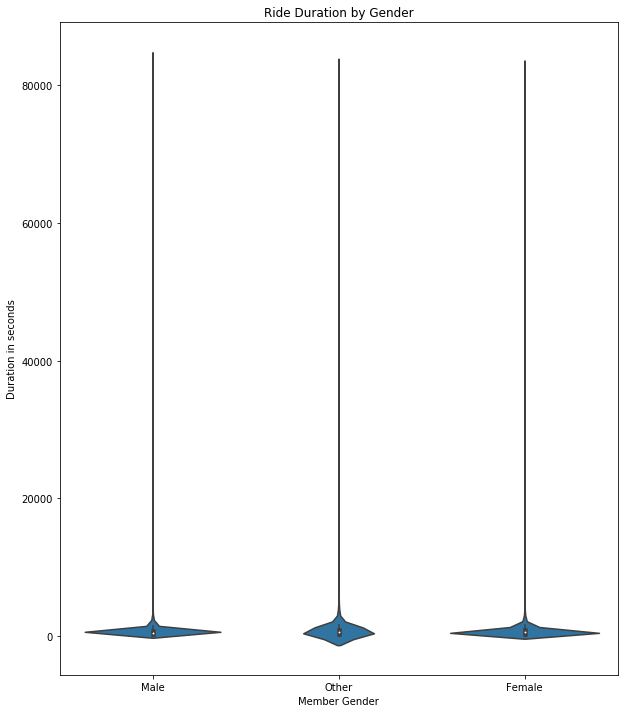

In [44]:
#violin plot showing relationship between member gender and ride duration
violinchart ([10,12],'member_gender','duration_sec','Duration in seconds','Member Gender','Ride Duration by Gender')

We notice from the violin plot above that most ride durations, regardless of gender, are below 10000 seconds. However, there seems to be more saturation for the female ride durations under the 10000 seconds. The longest duration however is by a male.

Does the user type affect the duration of the ride?

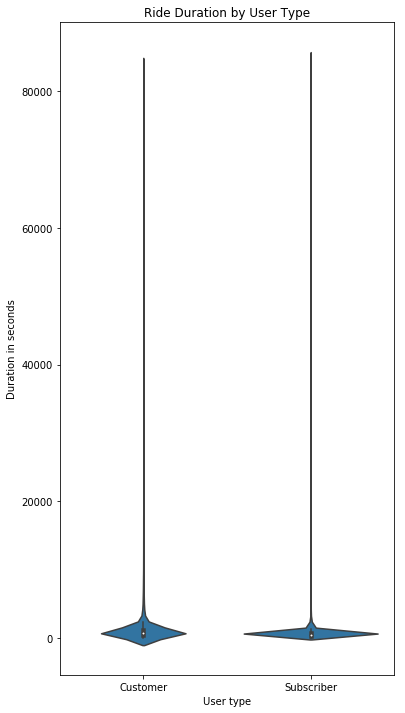

In [54]:
#violin plot showing relationship between user type and ride duration
violinchart ([6,12],'user_type','duration_sec','Duration in seconds','User type','Ride Duration by User Type')

The longest ride duration is by a subscriber, however there is a high saturation of subscribers in the low ride duration zone.

Does the member's year of birth affect their ride duration?

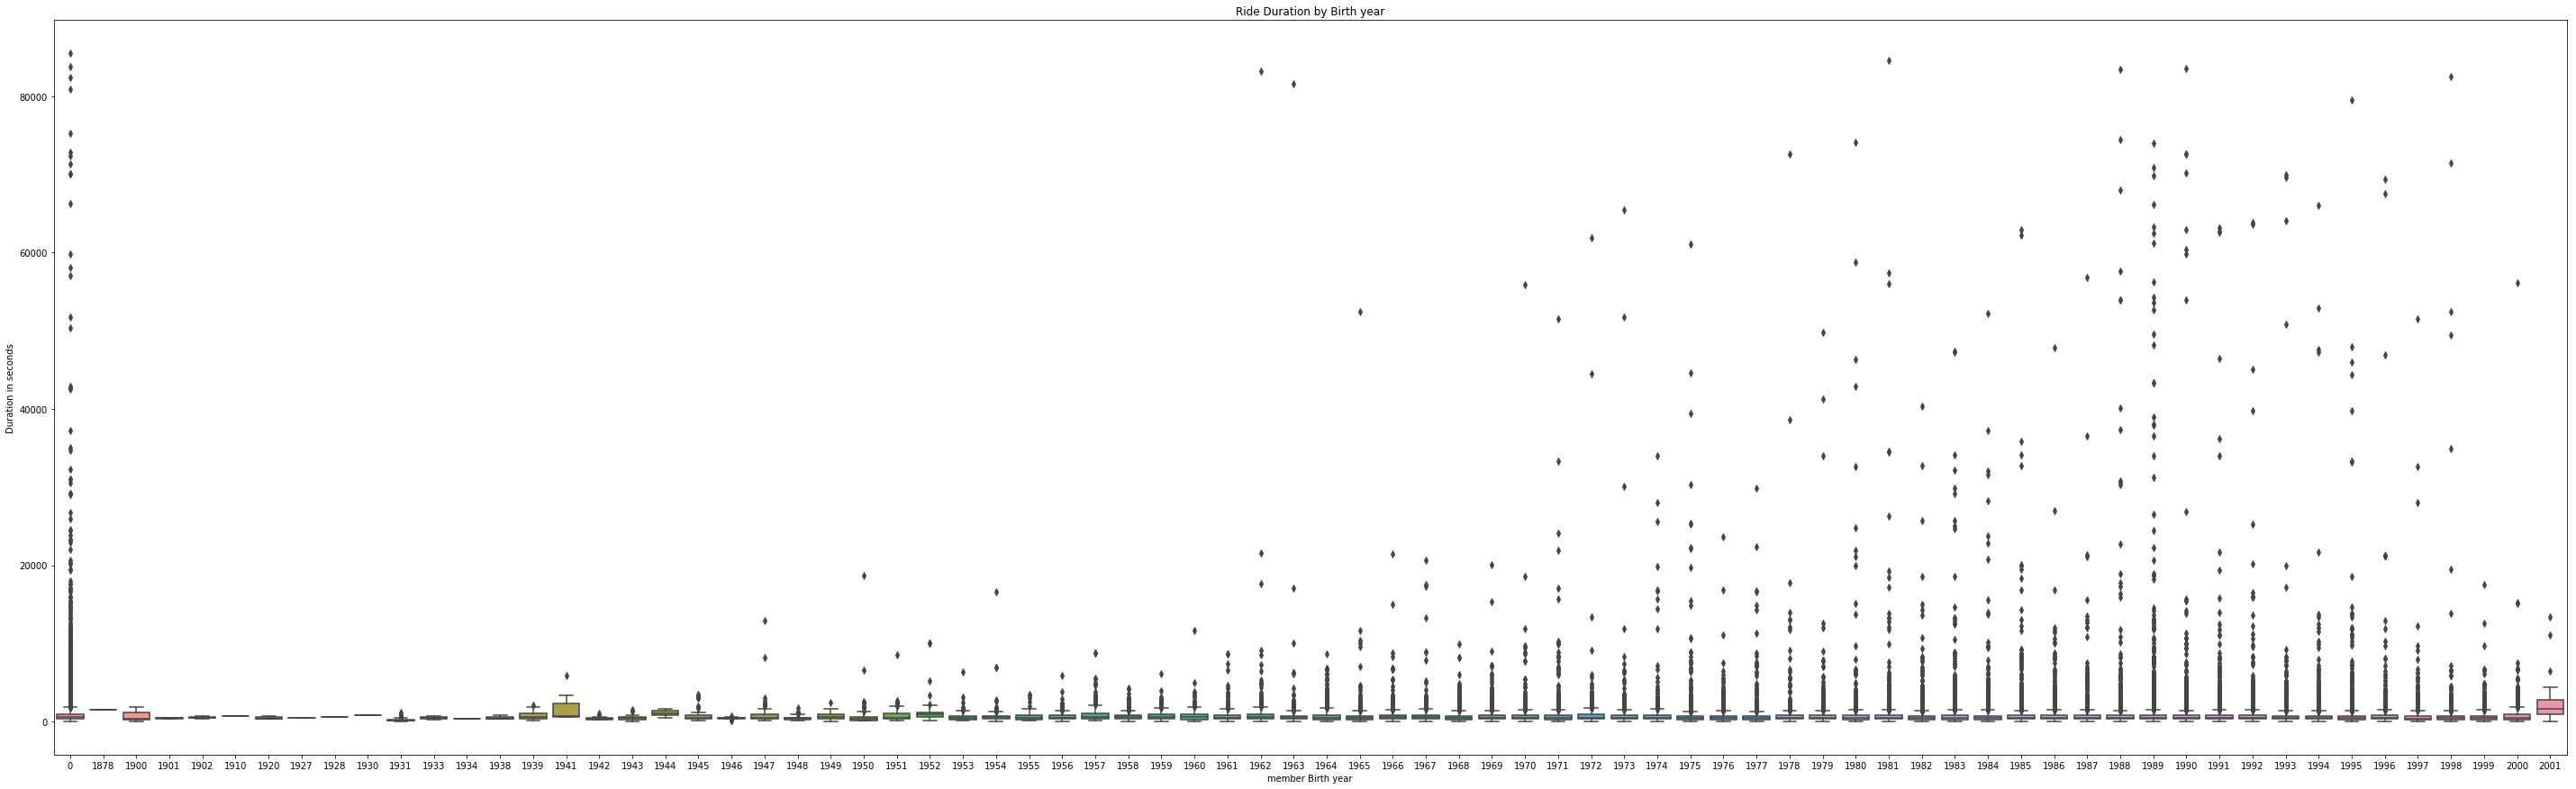

In [55]:
plt.figure(figsize = [50, 15])

sb.boxplot(data=df_FordGoBike, x ='member_birth_year', y='duration_sec');
plt.ylabel('Duration in seconds');
plt.xlabel('member Birth year');
plt.title('Ride Duration by Birth year');

From the chart we notice that those born in the earlier year have the least ride durations. As the years increase there are more representations for increased ride durations on the chart.

Is there any relationship between the start station and the ride duration?

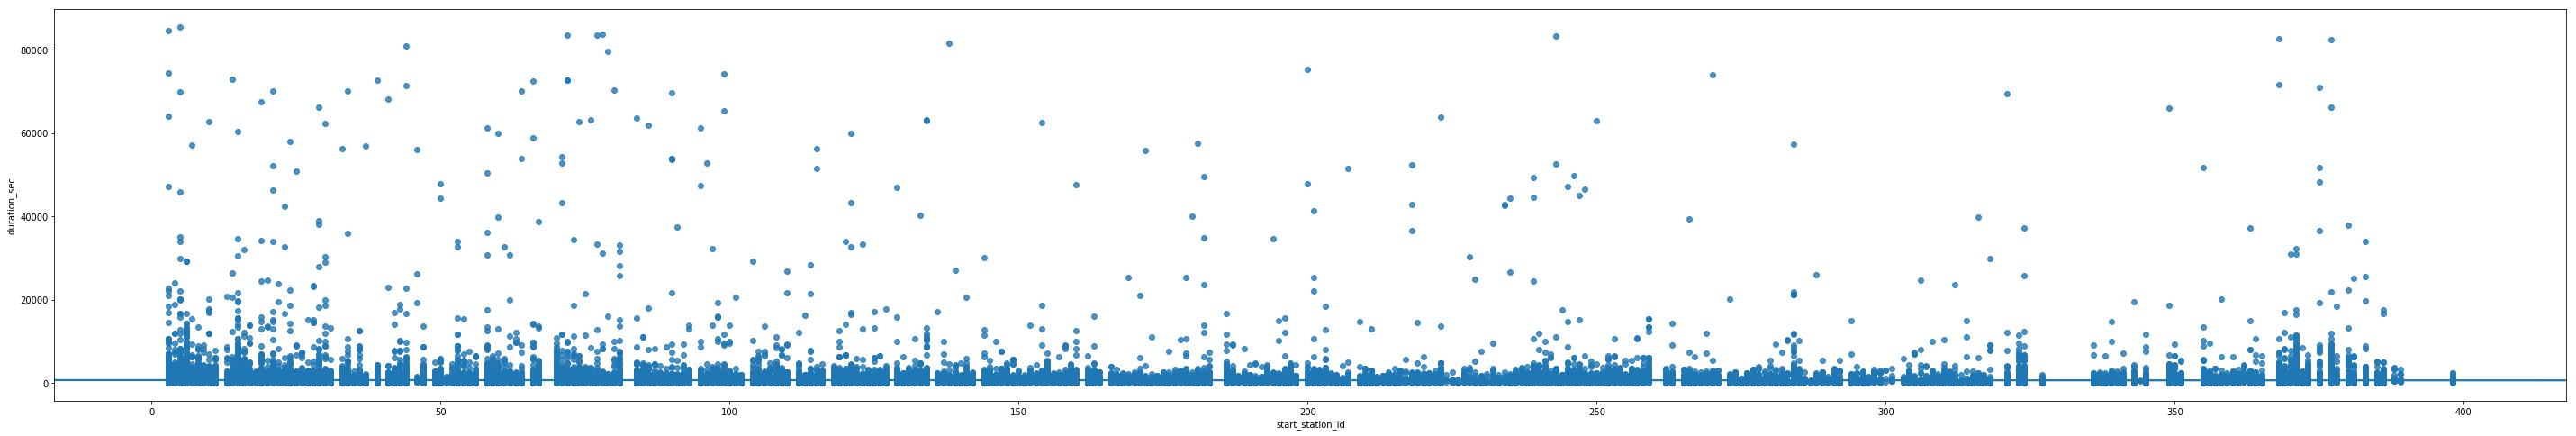

In [56]:
plt.figure(figsize = [50, 8])
sb.regplot(data=df_FordGoBike, x='start_station_id', y='duration_sec');

There is no correlation between the start station and ride duration per the scatter plot above.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the charts above, I noticed that the ride duration is affected by the member gender and member birth year.
The longest ride duration is by a male, however, there were some females with a ride durations close to the maximum.
Majority of the females however, were within the low duration of rides.

Additionally, the as the year of birth increases there were more values for ride durations. Interestingly, we could also see that those born on or befor 1960 did not go beyond 20000 seconds for rides, as opposed to those born beyond that year. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I noticed that only subscribers were able to engage in bikeshare for all trip.

It is also worth noting, that for all genders there are more subscribers than there are customers.

## Multivariate Exploration<a class="anchor" id="Multivariate"></a>

Following the chart comparing the user type against ride duration, let's further categorize that based on the member gender to see if the gender accounts for the plot we saw in the bivariate chart.

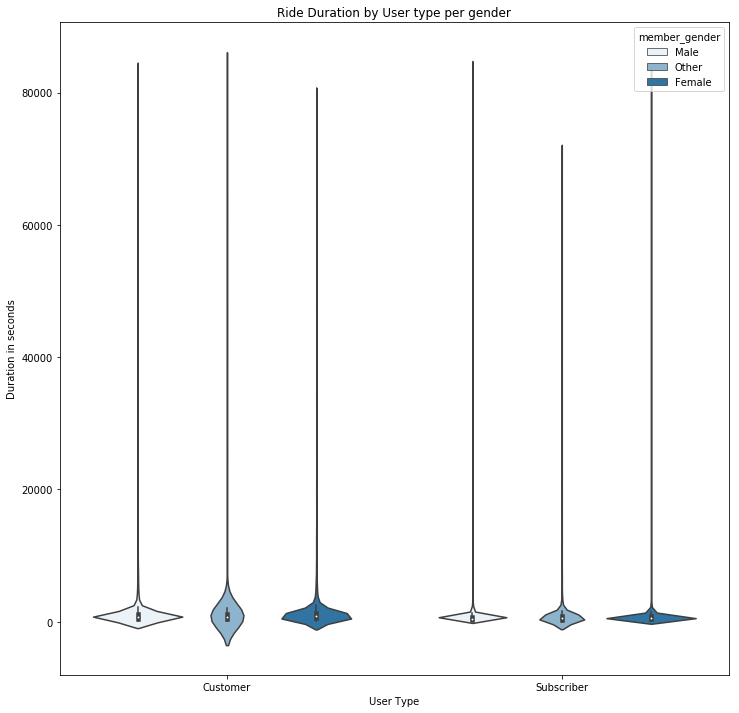

In [26]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [12,12])
sb.violinplot(data=df_FordGoBike, x='user_type', y='duration_sec', hue = 'member_gender', color=base_color);
plt.ylabel('Duration in seconds');
plt.xlabel('User Type');
plt.title('Ride Duration by User type per gender');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I noticed that for both customer and subscriber user types, the maximum ride duration for males was higher than that of females. However, whilst the other gender type had the longest ride duration for the customer user type, amongst the subscriber user type it did not have the longest ride duration.

### Were there any interesting or surprising interactions between features?

I found it interesting that regardless of the user type, males took much longer rides than females.

## Conclusions<a class="anchor" id="Conclusions"></a>
In summary, I found that there are more males in the ride sharing service than there are females. It is also safe to say that Males take longer rides than the females. Both males and females however, usually take rides of under 1000 seconds.
